## Curva de fallecimientos 
Curva diaria de fallecimientos con datos de NOTI-SINADEF. La versión actualizada de la base datos permite tener más confianza en los datos que se registran como fallecimientos por Covid-19, pues incluye varias metodologías.

In [1]:
#Para la manipulación del dataframe
import pandas as pd
import numpy as np
#Para los gráficos
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#1.Creamos una función que identifique de qué manera están las fechas en el 
#archivo, en este caso como AAAAMMDD.
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y%m%d')

#2.Importamos
df = pd.read_csv("rawdata/fallecidos_covid.csv", sep=";",
                  parse_dates=['FECHA_FALLECIMIENTO'], #Después de haber revisado
                                                                     #el archivo, veo que esas 
                                                                     #dos columnas son las que 
                                                                     #tienen fechas.
                  date_parser=dateparse)                             #Le indico que siga
                                                                     #las instrucciones de arriba
                                                                     #para reconocer las fechas.

#3.Filtramos solo aquellos datos que nos interesan, de Chimbote y Nuevo Chimbote
filtro=['CHIMBOTE','NUEVO CHIMBOTE']
df = df[df.DISTRITO.isin(filtro)]

#4.Creamos una columna que se repita para que nos permita contar las muertes
#(En este caso, cada registro es una muerte)
df['Muertes']=1

#5.Hacemos la tabla dinamica
din=df.pivot_table('Muertes', #Esta será la columna que tome en cuenta para las operaciones. 
                   'FECHA_FALLECIMIENTO', #Esta la tomará como referencia.
                   aggfunc=np.sum) #Esta es la operación que realizará, una suma.

#5.1.'FECHA_FALLECIMIENTO' se añade como un índice al df, por tanto si luego queremos 
#llamarla como una columna Python no la reconocerá como tal. 
#Para eso tenemos que "sacarla" de ese formato y le ponemos un nombre más sencillo, 'FECHA'.
din.reset_index(drop=False,inplace=True) 
din.rename(columns={"FECHA_FALLECIMIENTO": "FECHA"},inplace=True)

#5.2.Por lo general, por un tema de registro, siempre el último día no tiene información del
#todo actualizada (en el transcurso del día se registran más fallecimientos). Por eso, prefiero
#eliminar el último día del df
ultimafila = len(din) - 1 #Creo un objeto que calcule la posición de la última fila
                          #Es -1 porque el índice de Pandas siempre empieza en 0, por tanto
                          #la última fila de todo df es -1.
din.drop(din.index[ultimafila],inplace=True)

#6.Calculamos la media móvil de muertes por cada 10 días
din['MuertesSieteDias'] = din.rolling(window=7).mean() #Si quisiera para 7 días, debería
                                                       #poner 4.

#7.Vemos cómo queda
din.head()

c:\programdata\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,FECHA,Muertes,MuertesSieteDias
0,2020-03-26,1,NaN
1,2020-03-27,1,NaN
2,2020-04-07,1,NaN
3,2020-04-11,1,NaN
4,2020-04-13,2,NaN


In [2]:
din.tail()

,FECHA,Muertes,MuertesSieteDias
489,2021-11-19,1,1.285714
490,2021-11-20,1,1.285714
491,2021-11-21,1,1.285714
492,2021-11-22,1,1.142857
493,2021-11-24,1,1.142857


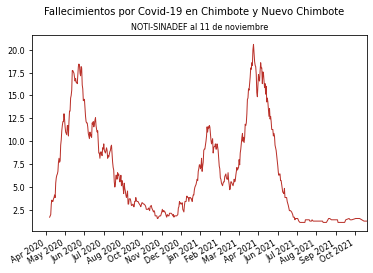

In [3]:
#1.Le indicamos el eje Y y X del df que queremos usar
plt.plot( 'FECHA', 'MuertesSieteDias', data=din, marker='', color='#BA312A', 
         linewidth=1, label="Muertes diarias 2020-2021")

#2.Indicamos cómo queremos que se vean las fechas en el gráfico
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

#3.Indicamos el intervalo entre las fechas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=35)) #Importante el intervalo

#4.Añadimos una función que hacer alcanzar el texto de la mejor manera dentro del área
#del gráfico
plt.gcf().autofmt_xdate()#esto hace que las fechas alcancen en el área del gráfico 
                         #(en este caso, rota el texto a 30°)
#plt.xticks(fontsize=8, rotation=45)#con esto le damos el giro exacto y el tamaño de letra 
                                    #que queremos

#5.Le indicamos el tamaño de letra que buscamos en ambos ejes
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#6.Indicamos título y subtítulo
plt.title("NOTI-SINADEF al 11 de noviembre",fontsize=8)
plt.suptitle("Fallecimientos por Covid-19 en Chimbote y Nuevo Chimbote",fontsize=10)

#plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, -0.45), fontsize=8, 
#frameon=False) #leyenda forma n° 3, más info: https://queirozf.com/entries/matplotlib-examples-displaying-and-configuring-legends

#7.Le ponemos límite al eje X
plt.xlim('2020-03-15','2021-11-11') #más info: https://www.python-graph-gallery.com/191-custom-axis-on-matplotlib-chart

#8.Ploteamos
#plt.show()

#9.Guardamos
plt.savefig("11nov.png", facecolor='w', edgecolor='w', dpi= 250, 
            bbox_inches="tight",  pad_inches=0.2, transparent = False)

## Etapa post-vacunas
Lo que he tratado, a continuación, es revisar la cantidad de fallecidos diarios pero recién a partir de agosto de 2021, para comparar de manera más acuciosa la etapa de la pandemia en la que hay una mayor tasa de vacunación.

In [22]:
#Para la manipulación del dataframe
import pandas as pd
import numpy as np
#Para los gráficos
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#1.Creamos una función que identifique de qué manera están las fechas en el 
#archivo, en este caso como AAAAMMDD.
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y%m%d')

#2.Importamos
df = pd.read_csv("fallecidos_covid.csv", sep=";",
                  parse_dates=['FECHA_FALLECIMIENTO'], #Después de haber revisado
                                                                     #el archivo, veo que esas 
                                                                     #dos columnas son las que 
                                                                     #tienen fechas.
                  date_parser=dateparse)                             #Le indico que siga
                                                                     #las instrucciones de arriba
                                                                     #para reconocer las fechas.

#3.Filtramos solo aquellos datos que nos interesan, de Chimbote y Nuevo Chimbote
filtro=['CHIMBOTE','NUEVO CHIMBOTE']
df = df[df.DISTRITO.isin(filtro)]

#4.Creamos una columna que se repita para que nos permita contar las muertes
#(En este caso, cada registro es una muerte)
df['Muertes']=1

#5.Hacemos la tabla dinamica
din=df.pivot_table('Muertes', #Esta será la columna que tome en cuenta para las operaciones. 
                   'FECHA_FALLECIMIENTO', #Esta la tomará como referencia.
                   aggfunc=np.sum) #Esta es la operación que realizará, una suma.

#5.1.'FECHA_FALLECIMIENTO' se añade como un índice al df, por tanto si luego queremos 
#llamarla como una columna Python no la reconocerá como tal. 
#Para eso tenemos que "sacarla" de ese formato y le ponemos un nombre más sencillo, 'FECHA'.
din.reset_index(drop=False,inplace=True) 
din.rename(columns={"FECHA_FALLECIMIENTO": "FECHA"},inplace=True)

#5.2.Por lo general, por un tema de registro, siempre el último día no tiene información del
#todo actualizada (en el transcurso del día se registran más fallecimientos). Por eso, prefiero
#eliminar el último día del df
ultimafila = len(din) - 1 #Creo un objeto que calcule la posición de la última fila
                          #Es -1 porque el índice de Pandas siempre empieza en 0, por tanto
                          #la última fila de todo df es -1.
din.drop(din.index[ultimafila],inplace=True)

#6. Filtramos solo las fechas que nos interesan
filtro=din[(din['FECHA'] > '2021-08-01') & (din['FECHA'] < '2021-11-25')]

#7.Calculamos la media móvil de muertes por cada 10 días
filtro['MuertesSieteDias'] = filtro.rolling(window=15).mean() #Si quisiera para 7 días, debería
                                                       #poner 4.

filtro.head()

c:\programdata\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-22-8916a7eccc03>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['MuertesSieteDias'] = filtro.rolling(window=15).mean() #Si quisiera para 7 días, debería


,FECHA,Muertes,MuertesSieteDias
448,2021-08-03,1,NaN
449,2021-08-04,2,NaN
450,2021-08-06,2,NaN
451,2021-08-07,1,NaN
452,2021-08-13,1,NaN


In [30]:
filtro.tail()

,FECHA,Muertes,MuertesSieteDias
489,2021-11-19,1,1.266667
490,2021-11-20,1,1.266667
491,2021-11-21,1,1.266667
492,2021-11-22,1,1.266667
493,2021-11-24,1,1.200000


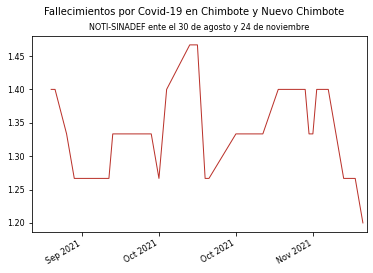

In [29]:
#8.Le indicamos el eje Y y X del df que queremos usar
plt.plot( 'FECHA', 'MuertesSieteDias', data=filtro, marker='', color='#BA312A', 
         linewidth=1, label="Muertes diarias 2020-2021")

#9.Indicamos cómo queremos que se vean las fechas en el gráfico
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

#10.Indicamos el intervalo entre las fechas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20)) #Importante el intervalo

#11.Añadimos una función que hacer alcanzar el texto de la mejor manera dentro del área
#del gráfico
plt.gcf().autofmt_xdate()#esto hace que las fechas alcancen en el área del gráfico 
                         #(en este caso, rota el texto a 30°)
#plt.xticks(fontsize=8, rotation=45)#con esto le damos el giro exacto y el tamaño de letra 
                                    #que queremos

#12.Le indicamos el tamaño de letra que buscamos en ambos ejes
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#13.Indicamos título y subtítulo
plt.title("NOTI-SINADEF ente el 30 de agosto y 24 de noviembre",fontsize=8)
plt.suptitle("Fallecimientos por Covid-19 en Chimbote y Nuevo Chimbote",fontsize=10)

#plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, -0.45), fontsize=8, 
#frameon=False) #leyenda forma n° 3, más info: https://queirozf.com/entries/matplotlib-examples-displaying-and-configuring-legends

#14.Le ponemos límite al eje X
plt.xlim('2021-08-30','2021-11-25') #más info: https://www.python-graph-gallery.com/191-custom-axis-on-matplotlib-chart

#15.Ploteamos
plt.show()

#16.Guardamos
#plt.savefig("11nov.png", facecolor='w', edgecolor='w', dpi= 250, 
#            bbox_inches="tight",  pad_inches=0.2, transparent = False)

Gráficamente, el resultado no es tan llamativo como el anterior, pero permite hacerse una idea del nivel de evolución de los fallecimientos por Covid-19 en la ciudad. Lo que se muestra es que en los últimos meses hay una disminución de éstos, pero que de todas maneras se han mantenido bajos.